# MNIST Multilayer-Perceptron

Implementation of a Multilayer Perceptron Network for the classification of handwritten digits.
This example is using the MNIST database of handwritten digits
(http://yann.lecun.com/exdb/mnist/).

The notebook already provides the required functionality to download the dataset. Your task is to implement the missing steps in the training process, test various configurations and finally train a MLP to achieve a high test accuracy.

Tasks:
- implement the TODOs
- run the script so that training starts
- try overfitting a fixed set of images
- test different network architectures and parameters
    - number of hidden layers
    - number of neurons
    - different optimizers
    - learning rate
    - adding dropout layer
    - normalize data
- achieve high test accuracy

Help:
- use the TensorFlow API Documentation [https://www.tensorflow.org/api_docs/](https://www.tensorflow.org/api_docs/)

In [17]:
import tensorflow as tf
import numpy as np

In [18]:
# imports MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [19]:
# print first 16 labels
for i in range(15):
    if i % 5 == 0:
        print("\n")
    print(y_train[i], end=' ')



5 0 4 1 9 

2 1 3 1 4 

3 5 3 6 1 

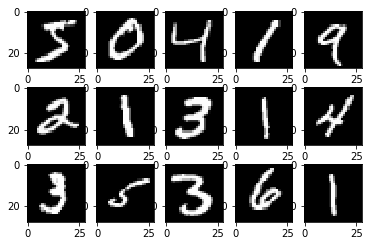

In [20]:
# plots the first 16 entries in the train set
import matplotlib.pyplot as plt

for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')

In [21]:
x_train.shape[1] * x_train.shape[2]

784

In [22]:
# TODO: define input and output network parameters
n_input = x_train.shape[1] * x_train.shape[2] # MNIST data input
n_classes =  10 # MNIST total classes

In [23]:
# TODO: reshape images
x_train = np.asarray([np.reshape(x, n_input) for x in x_train])
x_test = np.asarray([np.reshape(x, n_input) for x in x_test])

In [24]:
# one hot encoding of labels
def one_hot_encode(a, length):
    temp = np.zeros((a.shape[0], length))
    temp[np.arange(a.shape[0]), a] = 1
    return temp

y_train = one_hot_encode(y_train, n_classes)
y_test = one_hot_encode(y_test, n_classes)

In [25]:
# TODO: define hyper parameters
learning_rate = 0.01
training_iters = 20
batch_size = 60
display_step = 100

In [26]:
# placeholder
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

input = tf.reshape(x, shape=[-1, 28, 28, 1]) 

In [27]:
# MLP definition
flatten = tf.layers.flatten(input) # input layer

# TODO: define hidden layers
firstFully = tf.layers.dense(flatten, 500, activation="relu")
dropout = tf.layers.dense(firstFully, 200, activation="relu")

pred = tf.layers.dense(dropout, 10, activation=tf.nn.softmax) # output layer

In [28]:
# define cost
cost = tf.reduce_mean(tf.losses.softmax_cross_entropy(y, pred))

In [29]:
# TODO: define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [30]:
# evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [33]:
# initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    epoch = 1
    
    while epoch < training_iters:

        step = 1
        begin_pointer = 0

        # TODO: define training loop condition
        while step <= x_train.shape[0] / batch_size:
            # TODO: get batch of images and labels
            batch_x = x_train[begin_pointer:(batch_size * step) + 1]
            batch_y = y_train[begin_pointer:(batch_size * step) + 1]
            begin_pointer = (batch_size * step) + 1
            # run optimization op (backprop)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
            if step % display_step == 0:
                # calculate batch loss and accuracy
                loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                                  y: batch_y})
                print ("Iter " + str(step*batch_size) + \
                       ", Minibatch Loss= " + "{:.6f}".format(loss) + \
                       ", Training Accuracy= " + "{:.5f}".format(acc))
            step += 1

        print ("Epoch {} finished".format(epoch))
        epoch += 1
    print ("Optimization Finished!")

    # TODO: calculate accuracy for test set
    #predictions = 
    #tf.metrics.accuracy(y_train, predictions)
    loss, acc = sess.run([cost, accuracy], feed_dict={x: x_test, y: y_test})
    print ("Test Loss= " + "{:.6f}".format(loss) + ", Test Accuracy= " + "{:.5f}".format(acc))
    

Iter 6000, Minibatch Loss= 2.377380, Training Accuracy= 0.08333
Iter 12000, Minibatch Loss= 2.213177, Training Accuracy= 0.25000
Iter 18000, Minibatch Loss= 2.211646, Training Accuracy= 0.25000
Iter 24000, Minibatch Loss= 2.011040, Training Accuracy= 0.45000
Iter 30000, Minibatch Loss= 2.094409, Training Accuracy= 0.36667
Iter 36000, Minibatch Loss= 1.944453, Training Accuracy= 0.51667
Iter 42000, Minibatch Loss= 2.077243, Training Accuracy= 0.38333
Iter 48000, Minibatch Loss= 2.061150, Training Accuracy= 0.40000
Iter 54000, Minibatch Loss= 1.811148, Training Accuracy= 0.65000
Iter 60000, Minibatch Loss= 1.850982, Training Accuracy= 0.61017
Iter 6000, Minibatch Loss= 1.877654, Training Accuracy= 0.58333
Iter 12000, Minibatch Loss= 1.811146, Training Accuracy= 0.65000
Iter 18000, Minibatch Loss= 1.827371, Training Accuracy= 0.63333
Iter 24000, Minibatch Loss= 1.844474, Training Accuracy= 0.61667
Iter 30000, Minibatch Loss= 2.044204, Training Accuracy= 0.41667
Iter 36000, Minibatch Loss=

Iter 48000, Minibatch Loss= 1.843759, Training Accuracy= 0.61667
Iter 54000, Minibatch Loss= 1.727266, Training Accuracy= 0.73333
Iter 60000, Minibatch Loss= 1.783180, Training Accuracy= 0.67797
Iter 6000, Minibatch Loss= 1.811150, Training Accuracy= 0.65000
Iter 12000, Minibatch Loss= 1.761125, Training Accuracy= 0.70000
Iter 18000, Minibatch Loss= 1.811150, Training Accuracy= 0.65000
Iter 24000, Minibatch Loss= 1.811149, Training Accuracy= 0.65000
Iter 30000, Minibatch Loss= 1.909943, Training Accuracy= 0.55000
Iter 36000, Minibatch Loss= 1.777817, Training Accuracy= 0.68333
Iter 42000, Minibatch Loss= 1.894436, Training Accuracy= 0.56667
Iter 48000, Minibatch Loss= 1.877808, Training Accuracy= 0.58333
Iter 54000, Minibatch Loss= 1.744483, Training Accuracy= 0.71667
Iter 60000, Minibatch Loss= 1.783184, Training Accuracy= 0.67797
Iter 6000, Minibatch Loss= 1.810631, Training Accuracy= 0.65000
Iter 12000, Minibatch Loss= 1.761150, Training Accuracy= 0.70000
Iter 18000, Minibatch Loss=

In [32]:
x_test.shape

(10000, 784)